# Demonstrate Color Handling for PyMol via API

This notebook will demonstrate dealing with colors via the PyMol API that works via scripting.

Related resources:

- The [PyMol wiki Colors page](https://pymolwiki.org/index.php/Color_Values) has a nice list of colors that can be used and what PyMol uses by default for certain items. 

- The [Jmol colors page](http://jmol.sourceforge.net/jscolors/) has a nice account of colors and some schemes commonly used in molecular visualization.

Return to [the first page](index.ipynb) for the demonstration notebook [index](index.ipynb).

----


## Preparation

As see in other notebooks, the initial commands to set things up to send commands to PyMol are fairly standard and so running this code will allow later commands to appear more straightforward by allowing us to skip listing all these again.

In [1]:
init_block = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

import pymol
cmd = pymol.cmd
'''

With a block of code defined that we can use within this running notebook, we can now step through some commands pertinent to colors in PyMol.

## Defined colors within PyMol

A number of colors are already defined and named in PyMol. The [PyMol wiki Colors page](https://pymolwiki.org/index.php/Color_Values) has a nice list of colors that can be used and what PyMol uses by default for certain items.     
Running the code in the next two cells will list those colors here. (The `cmd.get_color_indices()` is the key command; the rest is just for arranging a nicer display. The assignment of the bash output to a variable follows from [here](https://nbviewer.jupyter.org/github/fomightez/ptmbr-accompmatz/blob/master/notebooks/Sending%20PatMatch%20output%20directly%20to%20Python.ipynb#Option-1).)

In [2]:
cmds2run = '''ls = list(cmd.get_color_indices())
pymol_colors = [repr(x[0]) for x in ls]
ll = '\\n'.join(pymol_colors)
print(ll)
'''
script_txt = init_block + cmds2run
%store script_txt > script_cl.py

Writing 'script_txt' (str) to file 'script_cl.py'.


In [3]:
ll = !pymol -cq script_cl.py
import IPython
print(IPython.utils.text.columnize(ll.l)) #based on https://github.com/ipython/ipython/issues/8741

'white'         'yelloworange'  'lithium'     'technetium'    'gold'         
'black'         'tv_orange'     'beryllium'   'ruthenium'     'mercury'      
'blue'          'pink'          'boron'       'rhodium'       'thallium'     
'green'         'firebrick'     'fluorine'    'palladium'     'lead'         
'red'           'chocolate'     'neon'        'silver'        'bismuth'      
'cyan'          'brown'         'sodium'      'cadmium'       'polonium'     
'yellow'        'wheat'         'magnesium'   'indium'        'astatine'     
'dash'          'violet'        'aluminum'    'tin'           'radon'        
'magenta'       'lightmagenta'  'silicon'     'antimony'      'francium'     
'salmon'        'density'       'phosphorus'  'tellurium'     'radium'       
'lime'          'paleyellow'    'chlorine'    'iodine'        'actinium'     
'slate'         'aquamarine'    'argon'       'xenon'         'thorium'      
'hotpink'       'deepsalmon'    'potassium'   'cesium'        'p

Note that we'll use `cmd.get_color_indices()` again below to see added color names.

## Defining your own colors and using them to color structures

You can assign a name to any set of color values specified as triples of independent Red, Green and Blue contribution in range 0-1.0 in square brackets (e.g. `[1.0,1.0,1.0]` for white). For convenience, numbers between 0 an 255 can be used as well, see [here](https://pymolwiki.org/index.php/Set_Color). (If at least one value is larger than 1, pymol will interpret all 3 values as between 0 and 255). 

If an existing color name is used, the old color will be replaced with the new assignment.

Examples of setting a color:

```python
cmd.set_color ("mybluepurple", [0.286274509804, 0.254901960784, 0.439215686275])
cmd.set_color ("my_color", [148, 125, 72])
```

Often times you'll want to use hex color codes from somewhere else, for example in order to keep match with colors used in other media, such as a poster. In the Jupyter/IPython environment, you can easily use those as this next script shows. It will use the function `hex_to_rgb(value)` to convert a hex code to a three r,g,b values. That is then assigned to name and used in the `cmd.color()` command because it needs a name in string form work. (The example comes from the demo notebook [Demonstrate Getting a Structure and Making an Image](demo_fetch.ipynb) and you should go through that page if you have questions about what is going on aside from `hex_to_rgb(value)`).

Writing 'script_txt' (str) to file 'script_o.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 3.51 sec. = 1024.2 frames/hour (3.51 sec. accum.).


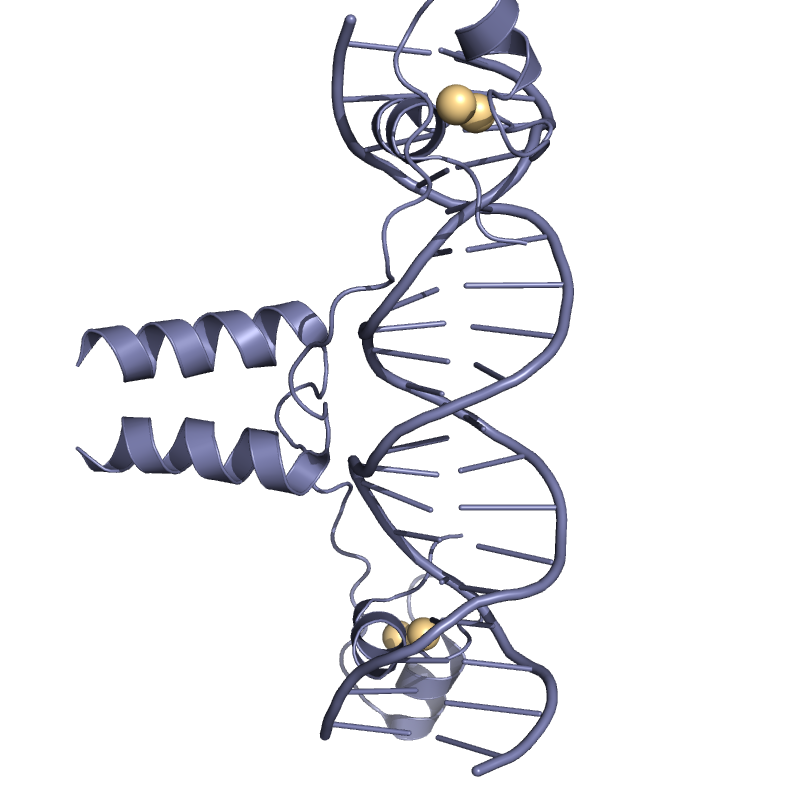

In [16]:
init_block = '''#!/usr/bin/python
import sys, os
# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')
import pymol
cmd = pymol.cmd
'''
cmds2run = '''cmd.fetch('1d66');cmd.zoom()
cmd.set ("ray_opaque_background", 0)
cmd.bg_color ("white")
cmd.set ("cartoon_fancy_helices", 1)
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")
cmd.show ("cartoon", "all")
cmd.show ("sphere", "metals")
def hex_to_rgb(value):
    #based on https://stackoverflow.com/a/214657/8508004
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
cmd.set_color ("ion_color", [*hex_to_rgb("#7D80B0")])
cmd.color ("ion_color", "polymer")
cmd.set ("fog_start", 0.70)
cmd.png('1d66improved.png', 800, 800, dpi=300, ray=1)
'''
script_txt = init_block + cmds2run
%store script_txt > script_o.py
!pymol -cq script_o.py
from IPython.display import Image
Image("1d66improved.png")

Note that if you define colors they will get added to the list they we saw under 'Defined colors within PyMol' above when we executed `cmd.get_color_indices()`.  
We'll do that here and show the output in its full glory so you can see each named color has an associated index next to it.

In [45]:
script_txt = init_block + "\n".join(cmds2run.split("\n")[:-2]) + "\nprint ('\\n\\ncolor_indices at present:\\n',cmd.get_color_indices())"
%store script_txt > script_l.py
!pymol -cq script_l.py

Writing 'script_txt' (str) to file 'script_l.py'.
color indices used: [5323, 5388, 28]
color index:5323 is  (1.0, 0.8509804010391235, 0.5607843399047852)
color index:5388 is  (0.4901960790157318, 0.501960813999176, 0.6901960968971252)
color index:28 is  (1.0, 0.30000001192092896, 0.30000001192092896)


color_indices at present:
 [('white', 0), ('black', 1), ('blue', 2), ('green', 3), ('red', 4), ('cyan', 5), ('yellow', 6), ('dash', 7), ('magenta', 8), ('salmon', 9), ('lime', 10), ('slate', 11), ('hotpink', 12), ('orange', 13), ('chartreuse', 14), ('limegreen', 15), ('purpleblue', 16), ('marine', 17), ('olive', 18), ('purple', 19), ('teal', 20), ('ruby', 21), ('forest', 22), ('deepblue', 23), ('grey', 24), ('gray', 25), ('carbon', 26), ('nitrogen', 27), ('oxygen', 28), ('hydrogen', 29), ('brightorange', 30), ('sulfur', 31), ('tv_red', 32), ('tv_green', 33), ('tv_blue', 34), ('tv_yellow', 35), ('yelloworange', 36), ('tv_orange', 37), ('pink', 48), ('firebrick', 49), ('chocolate', 50), ('

**Note the addition of 'ion_color' at the end.**

## Determining what colors are used

The result of `cmd.get_color_indices()` (or `get_colors `, see [here](https://pymolwiki.org/index.php/Get_colors)) shows what color names can be used but how do you know what are being used and what those really correspond to in rgb colorspace?

Suppose you were given a PyMol session file and needed to determine what colors were used so you could use them in another structure visualized witih PyMol or in other media. This shows how to use `get_color_tuple()` to do that.

First we'll save an session file using the code from above.

In [4]:
script_txt = init_block + "\n".join(cmds2run.split("\n")[:-2]) + "\ncmd.save('test_save.pse')"
%store script_txt > script_s.py
!pymol -cq script_s.py

Writing 'script_txt' (str) to file 'script_s.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 3.44 sec. = 1047.3 frames/hour (3.44 sec. accum.).


Now we'll load that session and go through the colors used for all objects in that session using `cmd.iterate()`, see [here](https://pymolwiki.org/index.php/Iterate). (We'll keep it very simple by selecting 'all' here as the scope of what to iterate over, but you can specify what to iterate on so you can ultimately drill down on what specifc structural element is assigned what color.) PyMol allows uers to define stored assignments in its namespace under its `stored.` object, see [here](https://pymolwiki.org/index.php/Pymol.stored).

In [51]:
cmds2run = '''cmd.load('test_save.pse')
stored.colors = []
cmd.iterate ("all", "stored.colors.append(color)")
color_indices_used = list(set(stored.colors))
print("color indices used:",color_indices_used)
print("\\n")
color_names_by_index = {x[1]:x[0] for x in cmd.get_color_indices()}
cmd.get_color_indices()
for x in color_indices_used:
    print("color index:{} is ".format(x),cmd.get_color_tuple(x))
    print("color index:{} is named ".format(x),color_names_by_index[x])
'''
script_txt = init_block + cmds2run
%store script_txt > script_o.py
!pymol -cq script_o.py

Writing 'script_txt' (str) to file 'script_o.py'.
color indices used: [5323, 5388, 28]


color index:5323 is  (1.0, 0.8509804010391235, 0.5607843399047852)
color index:5323 is named  cadmium
color index:5388 is  (0.4901960790157318, 0.501960813999176, 0.6901960968971252)
color index:5388 is named  ion_color
color index:28 is  (1.0, 0.30000001192092896, 0.30000001192092896)
color index:28 is named  oxygen


I think index #28, "oxygen", appears due to water in the initial loading display, maybe?
That isn't really important. What is interesting is that we now have the rgb values showing for the 'ion_color' color that was stored inside the session file. We could use that information elsewhere. (That is if we didn't already know it because we defined it with a color hex code earlier in this notebook).


Alternatively, instead of taking advantage of `stored.`, we could just have used a Python variable ourselves since we aren't really looking for establishing variables in a session's memory. Here in the next cell we simply define the list as `l`. Note that we can still use it with `cmd.iterate()` by including it within the expression in the quotes.

In [8]:
cmds2run = '''cmd.load('test_save.pse')
l = []
cmd.iterate ("all", "l.append(color)")
print(l[:10])
'''
script_txt = init_block + cmds2run
%store script_txt > script_o.py
!pymol -cq script_o.py

Writing 'script_txt' (str) to file 'script_o.py'.
[5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388, 5388]
